In [1]:
import pandas as pd

# Load preprocessed Data
import sys

sys.path.append("/home/alexabades/recsys")
from src.data.PreProcessDataContext import PreProcessDataNCFContextual

In [2]:
N_users = 528685
N_items = 143711
N_interactions = 5197755

In [3]:
# path = "../data/raw/YELP/yelp.csv"
path = "../data/processed/YELP/CNCF/yelp_2_ctx/yelp_2_ctx.train.rating"
data = pd.read_csv(path, sep="\t", index_col=False)

In [4]:
s0 = sys.getsizeof(data[: int(data.shape[0] / 4)]) / 1000000000
s1 = sys.getsizeof(data[: int(data.shape[0] / 3)]) / 1000000000
s2 = sys.getsizeof(data[: int(data.shape[0] / 2)]) / 1000000000
s3 = sys.getsizeof(data) / 1000000000
s5 = sys.getsizeof(pd.concat([data, data[: int(data.shape[0] / 4)]])) / 1000000000
s6 = sys.getsizeof(pd.concat([data, data[: int(data.shape[0] / 3)]])) / 1000000000
s7 = sys.getsizeof(pd.concat([data, data[: int(data.shape[0] / 2)]])) / 1000000000
s8 = sys.getsizeof(pd.concat([data, data])) / 1000000000
s9 = sys.getsizeof(pd.concat([data, data, data])) / 1000000000
N = data.shape[0]
size = [s0, s1, s2, s3, s5, s6, s7, s8, s9]
rows = [N // 4, N // 3, N // 2, N, N + N // 4, N + N // 3, N + N // 2, N * 2, N*3]

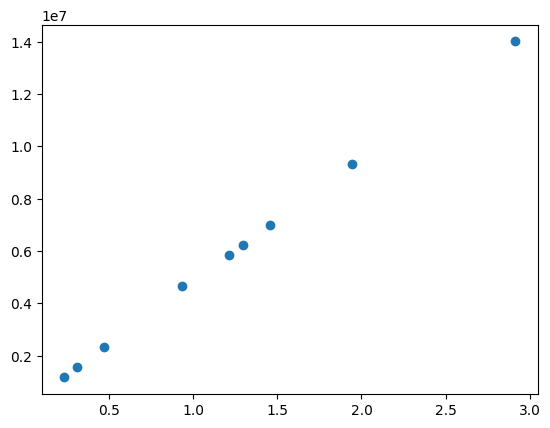

In [32]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
ax.scatter(size, rows)

In [35]:
data.groupby(['0'])['0.1'].count().max()
# 550000 rows; 3044 columns

3044

In [30]:
interacted_items = data.groupby(['0'])['0.1'].apply(set).to_dict()
total_items = set(range(data['businessId'].max()))
non_interacted_items = {user_id: total_items - interacted_set for user_id, interacted_set in interacted_items.items()}

In [36]:
N_items

143711

In [38]:
set([1, 2, 3, 4])

{1, 2, 3, 4}

In [ ]:
import matplotlib.pyplot as plt 
N_items = 143711
test_dic = dict()
dict_sizes = []
N = 5000
for i in range(N):
  test_dic[i] = set(range(N_items//2))
  if not i % 10 :
    dict_sizes.append(sys.getsizeof(test_dic) / 1000000)



: 

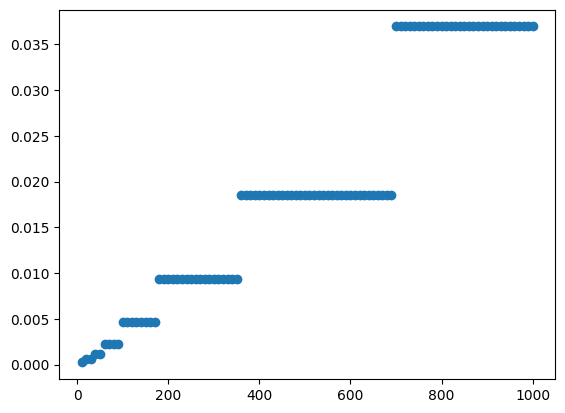

In [9]:
fig, ax = plt.subplots()
ax.scatter(range(10,1001,10), dict_sizes)

In [ ]:
import sys
import matplotlib.pyplot as plt

N_items = 100  # Assuming a value for N_items; adjust as needed
test_dic = {}
dict_sizes = []

for i in range(1, 1000):  # Start from 1 to avoid division by zero
    test_dic[i] = set(range(N_items//2))
    if i % 100 == 0:  # Collect sizes at every 100th iteration
        dict_sizes.append(sys.getsizeof(test_dic) / 1000000000)

# Correct the range to match the intervals where sizes were collected
y_ticks = range(100, 1001, 100)

fig, ax = plt.subplots()
ax.scatter(dict_sizes, y_ticks)  # Ensure x and y data lengths match
plt.show()


In [6]:
sys.getsizeof(test_dic) / 1000000000

1.852e-05

In [7]:
# data.to_csv('../data/processed/Yelp/yelp.csv', sep='\t', index=False)

In [9]:
columns = [
    "userId",
    "businessId",
    "stars",
    "latitude",
    "longitude",
    "isweekend",
    "daytime",
    "week_number",
    "season",
    "isHoliday",
    "num_firends",
    "num_elite",
    "seniority",
]

In [14]:
# data.to_csv('../data/processed/Yelp/yelp.csv')

YELP


In [1]:
import pandas as pd

# Load preprocessed Data
import sys

sys.path.append("/home/alexabades/recsys")
from src.data.PreProcessDataContext import PreProcessDataNCFContextual

In [5]:
path = "../data/raw/YELP/"
data_file = "yelp.csv"
user_column = "userId"
item_column = "businessId"
ratings_column = "stars"
ctx_categorical_columns = ["isweekend", "season", "isHoliday", "daytime"]
ctx_numerical_columns = [
    "latitude",
    "longitude",
    "week_number",
    "num_firends",
    "num_elite",
    "seniority",
]
columns_to_transform = {"cyclical": ["week_number"]}
min_interactions = 1

In [6]:
data = PreProcessDataNCFContextual(
    path=path,
    data_file=data_file,
    user_column=user_column,
    item_column=item_column,
    ratings_column=ratings_column,
    ctx_categorical_columns=ctx_categorical_columns,
    ctx_numerical_columns=ctx_numerical_columns,
    columns_to_transform=columns_to_transform,
    min_interactions=min_interactions,
)

cyclical transformation performed on ['week_number'] 


/home/alexabades/recsys/src/data/PreProcessDataContext.py:130: UserWarning: 
No Columns specified to normalize: Normalizing all Numerical Columns
  warnings.warn(


Iteration 0
Iteration 1
Iteration 2
K-core cleaning performed with k: 1


KeyboardInterrupt: 

In [4]:
data.save_data(folder_name="yelp_10_ctx")

Saved in:  /home/alexabades/recsys/src/data/processed/yelp_2_ctx/yelp_2_ctx


FRAPPE


In [1]:
import pandas as pd

# Load preprocessed Data
import sys

sys.path.append("/home/alexabades/recsys")
from src.data.PreProcessDataContext import PreProcessDataNCFContextual

In [2]:
path = "../data/raw/frappe/"
data_file = "frappe.csv"
meta_file = "meta.csv"
user_column = "user"
item_column = "item"
ratings_colum = "rating"
ctx_categorical_columns = [
    "daytime",
    "weather",
    "isweekend",
    "homework",
]
ctx_numerical_columns = ["cnt"]
columns_to_transform = {"log": "cnt"}
min_interactions = 5

In [3]:
data = PreProcessDataNCFContextual(
    path=path,
    data_file=data_file,
    meta_file=meta_file,
    user_column=user_column,
    item_column=item_column,
    ratings_column=ratings_colum,
    ctx_categorical_columns=ctx_categorical_columns,
    ctx_numerical_columns=ctx_numerical_columns,
    columns_to_transform=columns_to_transform,
    min_interactions=min_interactions,
)

/home/alexabades/recsys/src/data/PreProcessDataContext.py:213: UserWarning: No Key Column specified. Using item column as Key column.
  warnings.warn(
/home/alexabades/recsys/src/data/PreProcessDataContext.py:164: UserWarning: No Columns specified to nomralize...........Normalizing all Numerical Columns
  warnings.warn(


log transformation performed on ['cnt'] 
Iteration 0
Iteration 1


In [6]:
data.data["cnt"].max()

1.0

In [7]:
data.save_data(folder_name="frappe_ctx")

Saved in:  /home/alexabades/recsys/src/data/processed/frappe_ctx/frappe_ctx


In [2]:
import pandas as pd
path = '../data/processed/YELP/CNCF/yelp_5_ctx/yelp_ctx.train.rating'
data = pd.read_csv(path, sep="\t", index_col=False)

In [6]:
data.memory_usage().sum() / 1000000000

0.729522728

In [15]:
T = data.iloc[:,: ]

In [17]:
import torch 
ten = torch.tensor(T.values.astype(float)) 

In [19]:
ten.element_size() * ten.nelement() / 1000000000

0.7295226

In [1]:
dic = {
    "foldername": "frap-no-init_weights",
    "layers": [21, 9],
    "processed_data_root": "data/processed/frappeCtxA/",
    "raw_data_root": "data/processed/frappe/",
    "epochs": 100,
    "batch_size": 256,
    "lr": 0.001,
    "optimizer": "adam",
    "dropout": 0,
    "verbose": 1,
    "loss": "MSE",
    "name": "frappe",
}

In [7]:
with open('text.txt', 'w') as f:
  for i in dic.keys():
    f.write(f'{i}: {dic[i]}\n')

In [8]:
from src.models.contextNFC.context_nfc import DeepNCF


model = DeepNCF(
        num_users=215366,
        num_items=95895,
        num_context=22,
        mf_dim=8,
        layers=[86, 32, 16, 8], 
    )

In [10]:
from src.utils.model_stats.stats import calculate_model_size


calculate_model_size(model)

INFO: Model Size: 47.51 MB
INFO: Trainable parameter count: 12453905
